<a href="https://www.kaggle.com/code/matheusbaptistasilva/titanic-matheus-baptista?scriptVersionId=97853054" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center><h2>Titanic</h2></center>

<center><img src="https://aventurasnahistoria.uol.com.br/media/_versions/personagem/titanic_widelg.jpg" height=500 /></center>

1. [Problem Statement](#section1)


2. [Data Loading and Treatment](#section2)
  * 2.1 [Loading the Data Files](#section201)
  * 2.2 [Data Description](#section202)
  * 2.3 [Data Cleaning](#section203)
  
  
3. [Exploratory Data Analysis](#section3)
  * 3.1 [Analyzing the Correlation Between the Features](#section301)
        * 3.1.1 [Gender x Survived](#section3011)
        * 3.1.2 [Class x Survived](#section3012)
        * 3.1.3 [Fare x Survived](#section3013)
        * 3.1.4 [Age x Survived](#section3014)        
        
        
4. [Machine Learning](#section4)
  * 4.1 [Model Building and Preprocessing](#section401)
        * 4.1.1 [Logistic Regression](#section4011)
        * 4.1.2 [K-Nearest Neighbors](#section4012)
        * 4.1.3 [Decision Tree Classifier](#section4013)
        * 4.1.4 [Random Forest Classifier](#section4014)
        * 4.1.5 [Gradient Boosting Classifier](#section4015)
        
        
5. [Model Comparison](#section5)

<a id="section1"></a>
<span style="font-size:22px"> 1.  Problem Statement</span>


In this <a href='https://www.kaggle.com/competitions/titanic/overview'>Kaggle challenge</a>, we will analyse the data regarding to the passengers of one of the most infamous shipwrecks in history, the __Titanic__. In this historic event, 1502 out of the 2224 passengers and crew members died after __Titanic__ collision with an iceberg.

We need to __analyse__ what sorts of people were likely to __survive__ to the shipwreck based on the dataset with the passenger's information and whether they have survived or not. In this exercise, we will __treat__ and __analyse__ the data and apply the tools of __machine learning__ (Logistic Regression, KNN, Decision Tree, Random Forest and Gradient Boosting Classifier) to predict which passengers would have survived to this tragedy.

<a id="section2"></a>
<span style="font-size:22px"> 2. Data Loading and Treatment</span>

In [1]:
# importing libraries for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<a id="section201"></a>
<span style="font-size:19px"> 2.1.  Loading the Data Files</span>

In [2]:
train_df = pd.read_csv("../input/titanic/train.csv") # training set
test_df = pd.read_csv("../input/titanic/test.csv") # test set

display(train_df.head())
display(test_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<a id="section202"></a>
<span style="font-size:19px"> 2.2.  Data Description</span>


The __training set__ (train_df) provides the passengers survival status and other features that we will explore and use to create a machine learning model.

The __test set__ (test_df) will be used to check how well the model created from the training set will perfom. The test set does not provide the passenger survival status. The model will predict the passenger survival status.

The table below describes the meaning of the features given in both train and test datasets.

| Column Name                       | Description                                                                                        |
| ----------------------------------|:--------------------------------------------------------------------------------------------------:|
| PassengerId                       | Passenger Identity                                                                                                   | 
| Survived                          | Whether passenger survived or not                                                                  | 
| Pclass                            | Class of ticket                                                                                    | 
| Name                              | Name of passenger                                                                                  | 
| Sex                               | Sex of passenger                                                                                   |
| Age                               | Age of passenger                                                                                   |
| SibSp                             | Number of sibling and/or spouse travelling with passenger                                          |
| Parch                             | Number of parent and/or children travelling with passenger                                         |
| Ticket                            | Ticket number                                                                                      |
| Fare                              | Price of ticket                                                                                    |
| Cabin                             | Cabin number                                                                                       |

<a id="section203"></a>
<span style="font-size:19px"> 2.3.  Data Cleaning</span>

Before using the train dataset for analyzing and visualizing the data, we need to check:
- Different variables
- Null values

In [3]:
# get relevant information out of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# check the number of null values

print(train_df.isnull().sum())
print(''.center(20, "*"))
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
********************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Different types of variables are presented in the datasets:
  - **Numerical Features**: Age, Fare, SibSp and Parch
  - **Categorical Features**: Sex, Embarked, Survived and Pclass
  - **Alphanumeric Features**: Ticket and Cabin(Contains both alphabets and the numeric value)
  - **Text Features**: Name

The feature 'Age' have several missing values and will be treated. Features like 'Name', 'Cabin', 'Ticket' and 'Embarked' will not be used in this project to not affect the predictive model.

In [5]:
# create a function to modify the datasets
# modifications: lower cases, set an index, remove columns, fill null values and split the sex 

def prepare_data(data):
    data.columns = data.columns.str.lower()
    data.set_index("passengerid", inplace=True)
    data.drop(["embarked", "cabin", "name", "ticket"], inplace=True, axis=1)
    data['age'].fillna((data['age'].mean()), inplace=True)
    data['age'] = data['age'].astype(int)
    data['fare'].fillna((data['fare'].mean()), inplace=True)
    return pd.get_dummies(data, columns=["sex"])

train_df = prepare_data(train_df)
test_df = prepare_data(test_df)

<a id="section3"></a>
<span style="font-size:22px"> 3. Exploratory Data Analysis</span>

**Exploratory data analysis (EDA)** is an approach to analyze data sets to summarize the main informations and display the visual methods.

In [6]:
# checking the dataset after treating the data
train_df.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male
passengerid,,,,,,,,
1,0,3,22,1,0,7.2500,0,1
2,1,1,38,1,0,71.2833,1,0
3,1,3,26,0,0,7.9250,1,0
4,1,1,35,1,0,53.1000,1,0
5,0,3,35,0,0,8.0500,0,1


In [7]:
# get the descriptive statistics
train_df.describe()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208,0.352413,0.647587
std,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429,0.477990,0.477990
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [8]:
# group the features based on survival
# 1: survived
# 0: have not survived
train_df.groupby('survived').mean()

,pclass,age,sibsp,parch,fare,sex_female,sex_male
survived,,,,,,,
0,2.531876,30.240437,0.553734,0.329690,22.117887,0.147541,0.852459
1,1.950292,28.426901,0.473684,0.464912,48.395408,0.681287,0.318713


In [9]:
# group the features based on sex
# 1: male
# 0: female
train_df.groupby('sex_male').mean()

,survived,pclass,age,sibsp,parch,fare,sex_female
sex_male,,,,,,,
0,0.742038,2.159236,28.089172,0.694268,0.649682,44.479818,1.0
1,0.188908,2.389948,30.336222,0.429809,0.235702,25.523893,0.0


In [10]:
# group the features based on the ticket class
# 1: 1st class
# 2: 2nd class
# 3: 3rd class
train_df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,sex_female,sex_male
pclass,,,,,,,
1,0.629630,36.944444,0.416667,0.356481,84.154687,0.435185,0.564815
2,0.472826,29.804348,0.402174,0.380435,20.662183,0.413043,0.586957
3,0.242363,26.191446,0.615071,0.393075,13.675550,0.293279,0.706721


So far we can notice some points from this overview:
- About 38% of the passengers have survived the sank
- 74% of the survivors were female and 19% were male
- Passengers who paid more for their ticket were more likely to survive

<a id="section301"></a>
<span style="font-size:19px"> 3.1.  Analyzing the Correlation Between the Features</span>

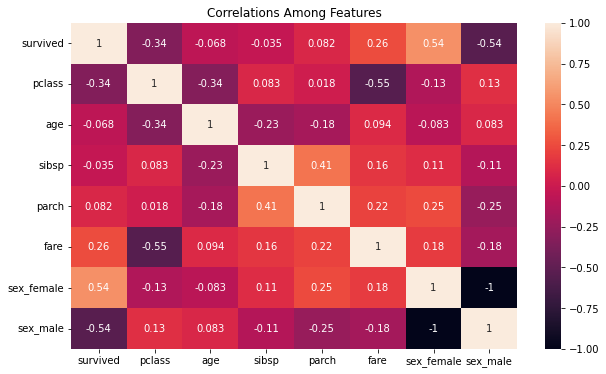

In [11]:
# heatmap to analyze the correlation among the features

plt.subplots(figsize = (10,6))
sns.heatmap(train_df.corr(), annot = True)
plt.title("Correlations Among Features", fontsize = 12);

Based on the heatmap and the target feature (survived) we can analyze the correlations:

__Positive Correlation Features:__
- fare & survived: 0.26
- sex_female & survived: 0.54

Passengers who paid more and passengers who were women were more likely to survive

__Negative Correlation Features:__
- pclass & survived: -0.34
- sex_male & survived: -0.54

More passengers were in lower classes and passengers in higher classes were more likely to survive, so passengers were more likely to have died based on their class. Passengers who were men were more likely to have died.


<a id="section3011"></a>
<span style="font-size:18px"> 3.1.1. Gender x Survived</span>


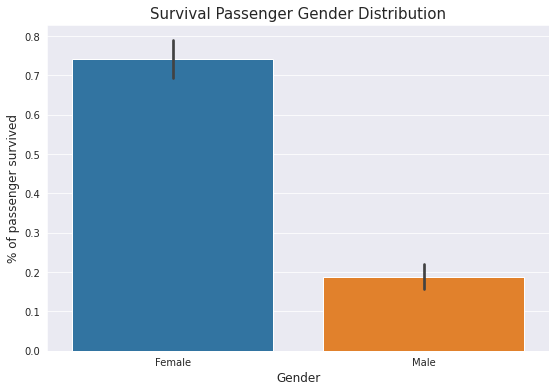

In [12]:
# bar plots showing the survival rate based on sex
sns.set_style("darkgrid")
plt.subplots(figsize = (9,6))
sns.barplot(x = 'sex_male', y = "survived", data = train_df)

# set the title, xlabel and ylabel
plt.title("Survival Passenger Gender Distribution", fontsize = 15)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 12)
plt.xlabel("Gender",fontsize = 12)
plt.xticks(sorted(train_df.sex_male.unique()), labels);

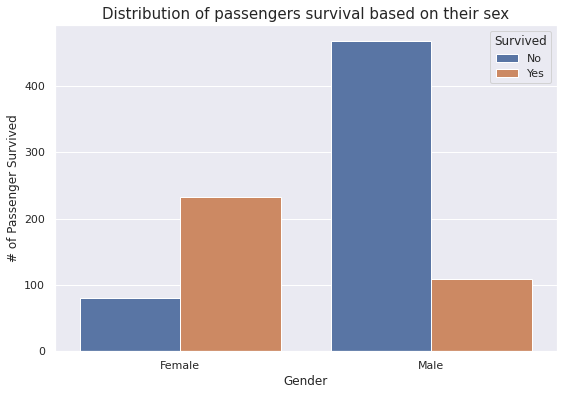

In [13]:
# bar plots showing the number of survivals based on their sex
sns.set(style='darkgrid')
plt.subplots(figsize = (9,6))
ax=sns.countplot(x='sex_male', data=train_df, hue='survived')
train_df.shape

# set the title, xlabel and ylabel
plt.title('Distribution of passengers survival based on their sex',fontsize=15)
plt.xlabel('Gender',fontsize=12)
plt.ylabel("# of Passenger Survived", fontsize = 12)
labels = ['Female', 'Male']
plt.xticks(sorted(train_df.survived.unique()),labels)

# setting the legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

<a id="section3012"></a>
<span style="font-size:18px"> 3.1.2. Class x Survived</span>

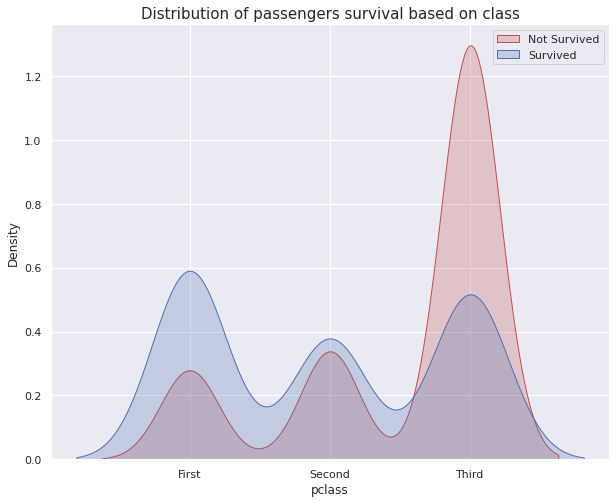

In [14]:
# kde plot of pclass vs. survival

plt.subplots(figsize=(10,8))
sns.kdeplot(train_df.loc[(train_df['survived'] == 0),'pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train_df.loc[(train_df['survived'] == 1),'pclass'],shade=True,color='b',label='Survived' )
plt.title('Distribution of passengers survival based on class',fontsize=15)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train_df.pclass.unique()),labels)
plt.legend();

<a id="section3013"></a>
<span style="font-size:18px"> 3.1.3. Fare x Survived</span>

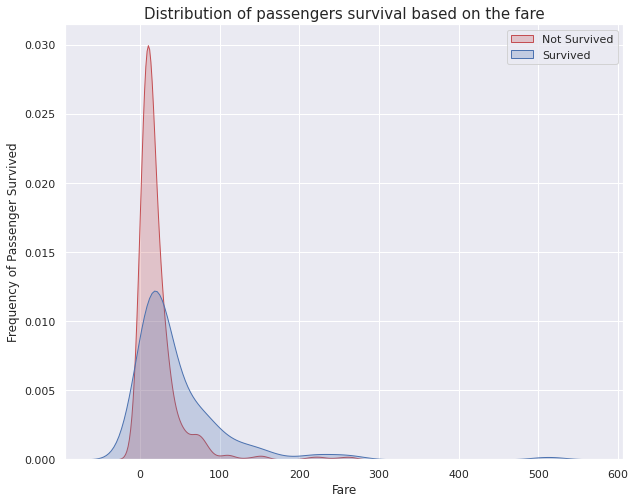

In [15]:
# kde plot of fare vs. survival

plt.subplots(figsize=(10,8))
ax=sns.kdeplot(train_df.loc[(train_df['survived'] == 0),'fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train_df.loc[(train_df['survived'] == 1),'fare'],color='b',shade=True,label='Survived' )
plt.title('Distribution of passengers survival based on the fare',fontsize=15)
plt.ylabel('Frequency of Passenger Survived',fontsize=12)
plt.xlabel('Fare',fontsize=12)
plt.legend();

<a id="section3014"></a>
<span style="font-size:18px"> 3.1.4. Age x Survived</span>

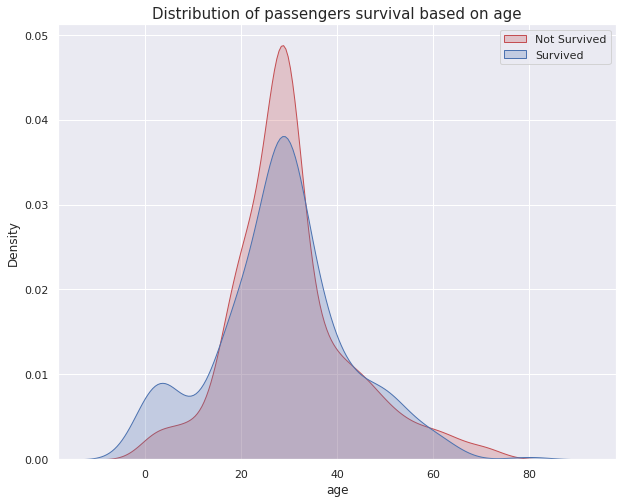

In [16]:
# kde plot of age vs. survival

fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.kdeplot(train_df.loc[(train_df['survived']==0),'age'],color='r',shade=True,label='Not Survived')
sns.kdeplot(train_df.loc[(train_df['survived']==1),'age'],color='b',shade=True,label='Survived')
plt.title('Distribution of passengers survival based on age',fontsize=15)
plt.legend();

Based on the plots obtained we can analyze the correlations:
- __gender x survived__
 - women were more likely to have survived
- __class x survived__
 - passengers from higher classes were more likely to have survived
- __fare x survived__
 - passengers that payed less were more likely to have died
- __age x survived__
 - passengers around the 30's were more likely to have died and children were more likely to have survived

<a id="section4"></a>
<span style="font-size:22px"> 4.  Machine Learning</span>

In the __machine learning__ section, we will train the data in the following models:

- Logistic Regression
- K-Nearest Neighbours (KNN)
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier

<a id="section401"></a>
<span style="font-size:19px"> 4.1. Model Building</span>

In [17]:
# separating features and target

X = train_df.drop('survived', axis=1)
y = train_df['survived']

In [18]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

After separating the values, adjust the data and spliting the data, we can start __building__ our models. Below are presented the __machine learning models__ I have selected based on what I have studied in the past months.

<a id="section4011"></a>
<span style="font-size:18px"> 4.1.1. Logistic Regression</span>

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

print(f"Training Accuracy of Logistic Regression is: {accuracy_score(y_train, lr.predict(X_train))}\n")
print(f"Test Accuracy of Logistic Regression is: {accuracy_score(y_test, lr.predict(X_test))}\n")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, lr.predict(X_test))}\n")
print(f"Precision Score: \n {precision_score(y_test, lr.predict(X_test))}\n")
print(f"Recall Score: \n {recall_score(y_test, lr.predict(X_test))}\n")
print(f"Classification Report:\n {classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of Logistic Regression is: 0.8019662921348315

Test Accuracy of Logistic Regression is: 0.7988826815642458

Confusion Matrix: 
[[90 15]
 [21 53]]

Precision Score: 
 0.7794117647058824

Recall Score: 
 0.7162162162162162

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<a id="section4012"></a>
<span style="font-size:18px"> 4.1.2. K-Nearest Neighbors</span>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(f"Training Accuracy of Logistic Regression is: {accuracy_score(y_train, knn.predict(X_train))}\n")
print(f"Test Accuracy of Logistic Regression is: {accuracy_score(y_test, knn.predict(X_test))}\n")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Precision Score: \n {precision_score(y_test, knn.predict(X_test))}\n")
print(f"Recall Score: \n {recall_score(y_test, knn.predict(X_test))}\n")
print(f"Classification Report:\n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of Logistic Regression is: 0.7963483146067416

Test Accuracy of Logistic Regression is: 0.7094972067039106

Confusion Matrix: 
[[87 18]
 [34 40]]

Precision Score: 
 0.6896551724137931

Recall Score: 
 0.5405405405405406

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       105
           1       0.69      0.54      0.61        74

    accuracy                           0.71       179
   macro avg       0.70      0.68      0.69       179
weighted avg       0.71      0.71      0.70       179



<a id="section4013"></a>
<span style="font-size:18px"> 4.1.3. Decision Tree</span>

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

print(f"Training Accuracy of Logistic Regression is: {accuracy_score(y_train, dtc.predict(X_train))}\n")
print(f"Test Accuracy of Logistic Regression is: {accuracy_score(y_test, dtc.predict(X_test))}\n")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Precision Score: \n {precision_score(y_test, dtc.predict(X_test))}\n")
print(f"Recall Score: \n {recall_score(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report:\n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Logistic Regression is: 0.973314606741573

Test Accuracy of Logistic Regression is: 0.7988826815642458

Confusion Matrix: 
[[90 15]
 [21 53]]

Precision Score: 
 0.7794117647058824

Recall Score: 
 0.7162162162162162

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<a id="section4014"></a>
<span style="font-size:18px"> 4.1.4. Random Forest</span>

In [22]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

print(f"Training Accuracy of Logistic Regression is: {accuracy_score(y_train, rd_clf.predict(X_train))}\n")
print(f"Test Accuracy of Logistic Regression is: {accuracy_score(y_test, rd_clf.predict(X_test))}\n")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Precision Score: \n {precision_score(y_test, rd_clf.predict(X_test))}\n")
print(f"Recall Score: \n {recall_score(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report:\n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Logistic Regression is: 0.973314606741573

Test Accuracy of Logistic Regression is: 0.8156424581005587

Confusion Matrix: 
[[92 13]
 [20 54]]

Precision Score: 
 0.8059701492537313

Recall Score: 
 0.7297297297297297

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



<a id="section4015"></a>
<span style="font-size:18px"> 4.1.5. Gradient Boosting Classifier</span>

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

print(f"Training Accuracy of Logistic Regression is: {accuracy_score(y_train, gb.predict(X_train))}\n")
print(f"Test Accuracy of Logistic Regression is: {accuracy_score(y_test, gb.predict(X_test))}\n")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Precision Score: \n {precision_score(y_test, gb.predict(X_test))}\n")
print(f"Recall Score: \n {recall_score(y_test, gb.predict(X_test))}\n")
print(f"Classification Report:\n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Logistic Regression is: 0.9002808988764045

Test Accuracy of Logistic Regression is: 0.8100558659217877

Confusion Matrix: 
[[93 12]
 [22 52]]

Precision Score: 
 0.8125

Recall Score: 
 0.7027027027027027

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



<a id="section5"></a>
<span style="font-size:22px"> 5. Model Comparison</span>

In [24]:
# compare the accuracy between the models

models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier'],
    'Score' : [accuracy_score(y_test, lr.predict(X_test)), accuracy_score(y_test, knn.predict(X_test)), 
               accuracy_score(y_test, dtc.predict(X_test)), accuracy_score(y_test, rd_clf.predict(X_test)), 
               accuracy_score(y_test, gb.predict(X_test))]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.815642
4,Gradient Boosting Classifier,0.810056
0,Logistic Regression,0.798883
2,Decision Tree Classifier,0.798883
1,K-Nearest Neighbors,0.709497


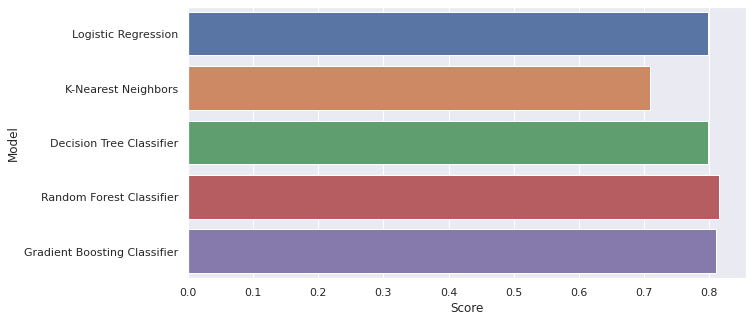

In [25]:
# plot the comparison between the models

plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Score', y = 'Model', data = models)
plt.show()

From those five models analyzed, the best fit for the data was the __Gradient Boost Classifier__ with an accuracy score of around 0.82.

Below we will use this __model to predict__ whether the passenger would have survived or not using __test_df dataset__ to test the model. Further on, we will replace the 'Survived' column from the 'gender_submission.csv' dataset with the values obtained from the model prediction and transform the results into a csv file.

In [26]:
gb_prediction = gb.predict(test_df)
prediction = pd.DataFrame(gb_prediction)
submission = pd.read_csv('../input/titanic/gender_submission.csv')
submission['Survived'] = prediction
submission.to_csv('submission.csv', index = False)